In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install scikit-learn
#!pip install tensorflow==2.16.1
#!pip install keras

In [2]:
import tensorflow

# Introduction to Neural Networks

This notebook contains the code examples found in Chapter 2, Section 1 of the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text contains much more content, especially additional explanations and figures: in this notebook you will find only the source code and related comments.

----

Now we'll look at the first concrete example of a neural network, which uses the Python Keras library to learn to classify handwritten digits. In the next chapter, we will go through each element of our example in detail and explain them.

The problem we're trying to solve here is classifying images of handwritten digits in grayscale (28 pixels by 28 pixels) into 10 categories (from 0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in machine learning that is almost as old as the field itself and has been heavily studied. It consists of 60,000 training images plus 10,000 test images, compiled by the National Institute of Standards and Technology (NIST in MNIST) in the 1980s. Solving MNIST can be thought of as the "Hello World" of deep learning — it's what you do to check whether your algorithms work as expected.

The MNIST dataset comes preloaded in Keras, in the form of a set of four NumPy arrays:

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


`train_images` and `train_labels` constitute the "training set", the data the model will learn from. The model will then be tested on the "test set", `test_images` and `test_labels`. Our images are encoded as NumPy arrays, and the labels are simply an array of digits from 0 to 9. There is a one-to-one correspondence between images and labels.

Let's look at the training data:

In [ ]:
train_images.shape # first dimension is the number of samples and the other two dimensions are the dimensions of the image

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Now let's look at the test dataset:

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from PIL import Image
import cv2

img_idx = 9000 # let's say we want to represent the 9000th image from the training set

im_resized = cv2.resize(train_images[img_idx, :, :], (224, 224), interpolation=cv2.INTER_LINEAR)
Image.fromarray(im_resized).show()

print('Image label: ', train_labels[img_idx])

Image label:  6


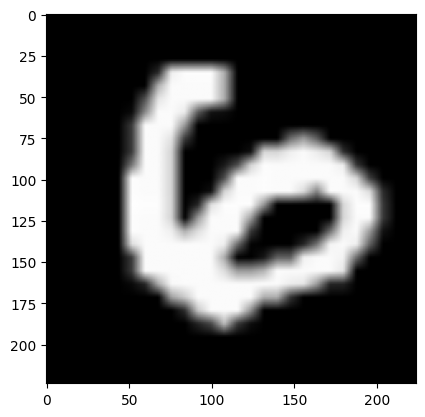

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(im_resized, cmap='gray') #im_resized because the image was very small

Our workflow will be as follows: first we will present the training data, `train_images` and `train_labels`, to our neural network. The network will then learn to associate images with labels. Finally, we will ask the network to produce predictions for `test_images`, and we will check whether those predictions match the labels from `test_labels`.

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))#512 neurons in the hidden layer, input_shape = 28 * 28 due to the image size, in the input layer we will have 784 neurons
network.add(layers.Dense(10, activation='softmax')) #10 because there are 10 digits, imagine it as 10 lamps, if the first lamp is 1 (closest to 1) then the digit is 0
#now we need to define the neural network and start predicting

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The central building block of neural networks is the "layer", a data-processing module you can think of as a "filter" for data. Some data goes in, and more useful representations come out. More precisely, layers extract representations from the data fed to them — hopefully representations that are more meaningful for the task at hand. Most deep learning is actually made of a sequence of simple layers that implement a kind of progressive "data distillation". A deep learning model is like a sieve for processing data, composed of a sequence of increasingly refined data filters — "layers".

Here our network consists of a sequence of two Dense layers, which are densely connected (also called "fully connected") neural layers. The second (and last) layer is a 10-way "softmax" layer, which means it will return a vector of 10 probability scores (which sum to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To prepare our network for training, we must also choose three more things as part of the "compile" step:

* Loss function: This is how the network will be able to measure how well it is doing on the training data, and thus how it should be guided.
* Optimizer: This is the mechanism by which the network will be updated based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of images that are correctly classified).

The precise role of the loss function and optimizer will be explained more clearly in the next two chapters.

The activation function introduces nonlinearity into the hidden layer.

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', #loss function based on which we optimize the weight factors
                metrics=['accuracy'])  #any classification metric

#we define some algorithm, stochastic gradient descent, gradient descent...

In [14]:
train_images.shape

(60000, 28, 28)

Before training, we will preprocess our data by reshaping it into the form the network expects and scaling it so that all values lie in the `[0, 1]` interval. Previously, our training images, for example, were stored in an array of shape `(60000, 28, 28)` with dtype `uint8` and values in the `[0, 255]` range. We transform them into a `float32` array of shape `(60000, 28 * 28)` with values between `0` and `1`.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) #reshape, we convert the image into 784 input neurons
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [16]:
train_images.shape

(60000, 784)

We must also convert the labels to categorical (one-hot) encoding:

In [17]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [18]:
train_images.shape

(60000, 784)

We are now ready to train our network, which in Keras is done by calling the model's `fit` method: we "fit" the model to the training data.

In [ ]:
network.fit(train_images, train_labels, epochs=10, batch_size=128) #fit means training the model, epochs represent how many times the data will pass through the network, in epochs we calculate w and bias and metric
#128 - number of samples after which we update the weight factors, it is important that it is less than the total number of samples, we want to optimize the weight factors more frequently

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8741 - loss: 0.4346
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9670 - loss: 0.1138
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.0730
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0511
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9898 - loss: 0.0359
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0273
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9942 - loss: 0.0205
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9961 - loss: 0.0161
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9970 - loss: 0.0120
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9981 - loss: 0.0086


During training two quantities are displayed: the network's "loss" on the training data, and the network's accuracy on the training data.

We quickly reach an accuracy of 0.989 (i.e., 98.9%) on the training data. Now let's check whether our model also performs well on the test set:

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9784 - loss: 0.0810


In [21]:
print('test_acc:', test_acc)

test_acc: 0.9818000197410583


In [ ]:
int(np.argmax(network.predict(np.expand_dims(test_images[0], axis=0)))) #argmax returns the index with the maximum value, i.e., the class with the highest probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


7

Our accuracy on the test set is 97.8% — this is somewhat lower than the accuracy on the training set.
This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data.